# Algorytm najszybszego spadku dla regresji wielomianowej

Algorytm przyjmuje zbiór danych - x oraz y i próbuje wyzaczyć funkcję wilomianową, która najlepiej przewiduje wartości y na podstawie x. Wynikiem jest wyznaczenie współczynników wielomianu.

### Importy

In [98]:
from matplotlib import pyplot as plt
import numpy as np
import random

### Początkowe współczynniki
Tworzymy losowe początkowe współczynniki wielomianu - od nich algorytm rozpocznie dopasowanie. Oraz oryginalne współczynniki na podstawie których zostanie wyznaczony zbiór danych. Aby zmienić generowany zbiór danych należy zmienić tablicę coeffs.

In [99]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10,10))
coeffs = [2, -5, 4] # a, b, c

### Wyznaczenie wartości wielomianu
Funkcja na podstawie współczynników oraz x wyznacza wartość y wielomianu.

In [100]:
def eval_2nd_degree(coeffs, x):
    a = (coeffs[0]*(x*x))
    b = coeffs[1]*x
    c = coeffs[2]
    y = a+b+c
    return y
    

### Wartości wielomianu z szumem
Funkcja jest analogiczna do poprzedniej - wyznacza wartość wielomianu na podstawie wpółczynników oraz x, ale dodatkowo dodaje szum do wyjściowych wartości - funkcja zostanie użyta przy generowaniu danych.

In [101]:
def eval_2nd_degree_jitter(coeffs, x, j):
    y = eval_2nd_degree(coeffs, x)
    
    interval_min = y-j
    interval_max = y+j
    
    return random.uniform(interval_min, interval_max)

### Wygenerowanie danych
Kod generuje zbiór danych. Na podstawie wartości x od -10 do 10 i losowych współczynników wielomianu generuje wartości y z szumem. Parametr j określa jak moco dane będą zaszumione

[-2.75898766 -5.65016775 -2.64800795 -0.87530755 -8.01730191 -0.07202148
  5.28994963 -0.73685206 -8.69865485  7.11491828  3.53780935  5.6983085
 -3.07830759  1.28764607  9.45509424  6.95589075 -9.90311757 -2.30741362
  0.85246282 -4.39966538  0.79658004  3.29939139 -1.77080971 -8.61248702
 -8.08537204 -8.46573256  5.29314956  8.89274736 -5.489419   -9.54545965
  0.57426227  1.98898479  0.28600353 -3.3779621  -6.74739724 -9.74245438
  6.70940724 -8.87576881  2.22682743  0.5484296  -5.13845562 -6.39800992
  3.76662938  0.84736151  1.02810373  6.79544869  2.20334512  3.65087577
 -9.40928261 -0.51270946  9.95897626  4.22555829  3.24859186  7.78895395
  2.92230082  2.48586306 -7.51038001  4.53569191  1.27276562  0.75734371
 -3.47811458 -2.76641217  0.3687908   5.73108176 -3.10855301  2.15342573
  9.14193125  9.51722955 -0.73921274  9.39733669 -8.08203669 -1.68282233
  0.63287602  2.9995979  -0.17714689  1.99519815  3.651222    3.90420391
  4.96344081  9.64202473  8.79805941 -5.23101012 -9.

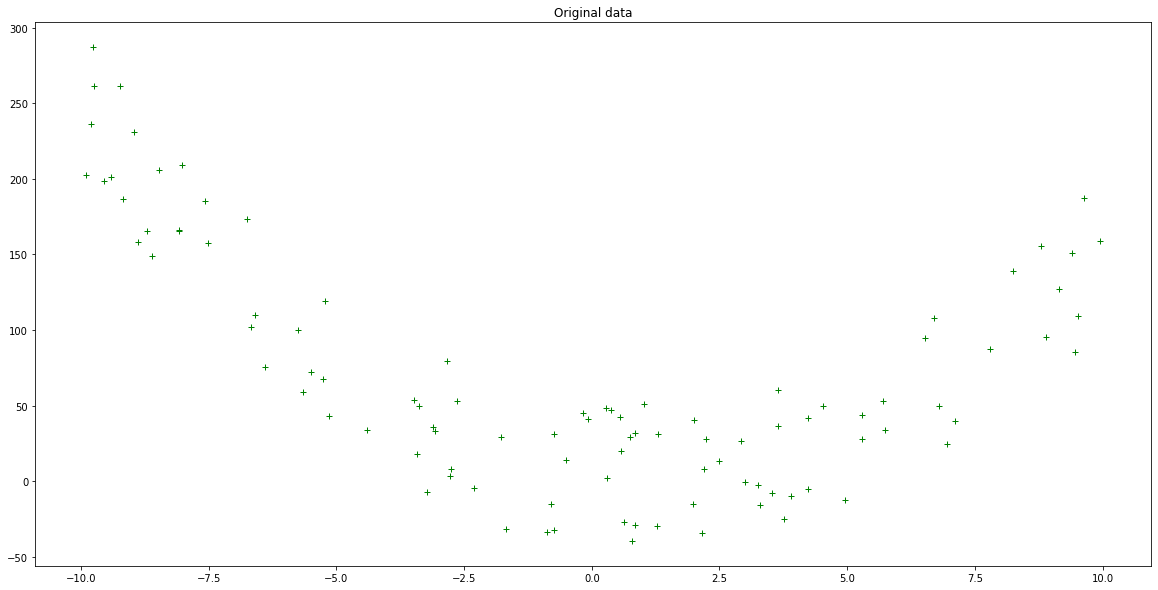

In [102]:
hundred_xs=np.random.uniform(-10,10,100)
print(hundred_xs)

j=50
x_y_pairs = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, j)
    x_y_pairs.append((x,y))
    
xs = []
ys = []
for a,b in x_y_pairs:
    xs.append(a)
    ys.append(b)
    
plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

### Funkcja straty
Do określenia jak mocno przewidziane wartości y są różne zostanie użyta kwadratowa funkcja straty.

In [103]:
def loss_mse(ys, y_bar):
    return sum((ys - y_bar)*(ys - y_bar)) / len(ys)


### Gradient
Funkcja przyjmuje współczynniki wielomianu, x, y oraz parametr prękości uczenia i wylicza za pomocą gradientu nowe wartości współczynników wielomianu.

In [104]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr): 
    a_s = []
    b_s = []
    c_s = []
        
    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x**2        
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y-y_bar)
        b_s.append(partial_b)
        partial_c = (y-y_bar)
        c_s.append(partial_c)
    
    num = [i for i in y_bars]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    
    new_model_coeffs = (a_new, b_new, c_new)
    
    #update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)
    
    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar
    
    

### Minimalizacja
Funkcja powtarza proces wyznaczenia nowych współczynników wielomianu zadaną ilość razy - epoch.

In [105]:
def gradient_descent(epochs, lr):
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    #print(losses)
    return loss[0], loss[1], loss[2], losses  #(updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

### Uruchomienie
Wartości wyznaczonego wielomionu zostają wyświetlone na wykresie z porównaniem do zbioru danych.

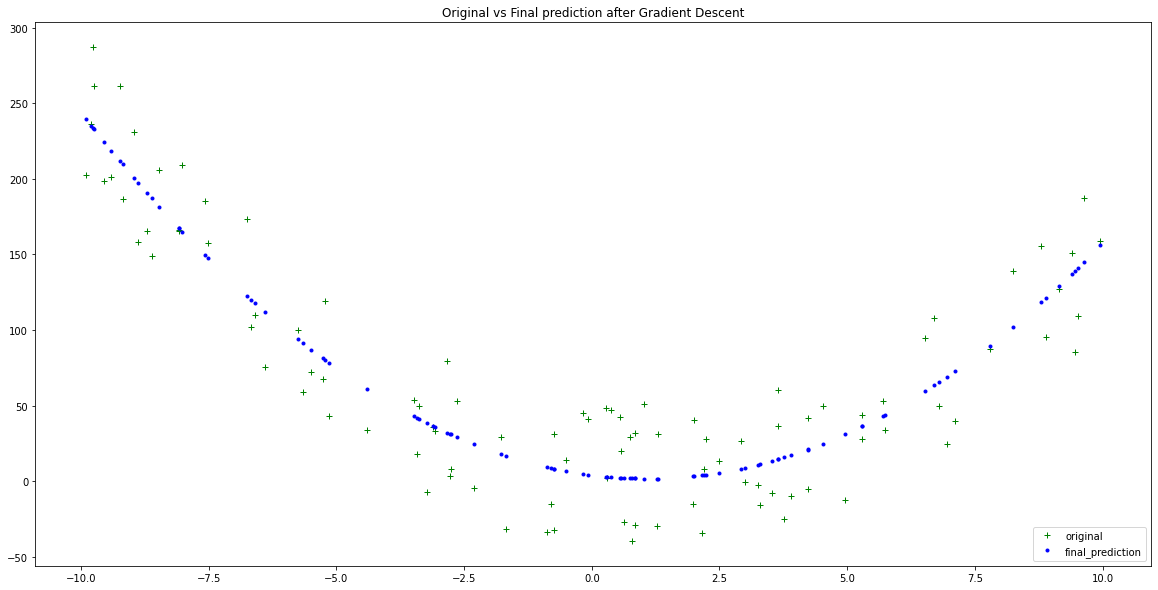

In [106]:
GD = gradient_descent(1500, 0.0001)

plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

### Wyznaczone współczynniki wielomianu

In [107]:

print("Początkowe współczynniki {}".format(rand_coeffs))
print("Wyznaczone współczynniki {}".format(GD[1]))
print("Oryginalne współczynniki {}".format(coeffs))

Początkowe współczynniki (-5, -5, 4)
Wyznaczone współczynniki (1.9655100088406912, -4.317400439992125, 4.040348505930957)
Oryginalne współczynniki [2, -5, 4]


### Funkcja straty
Wykres przedstawia jak zmianiała się wartość funkcji straty w kolejnych krokach algorytmu.

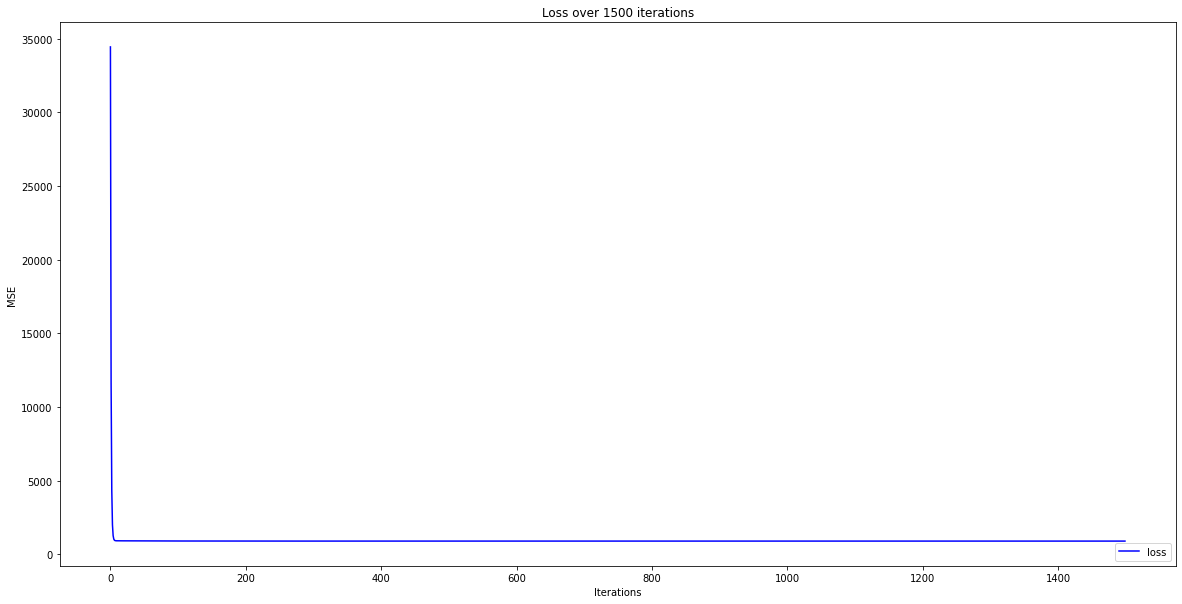

In [108]:
plt.figure(figsize=(20,10))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 1500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()